In [45]:
from pandas_datareader import data as pdr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime,date,timedelta

In [8]:
YEARS_RANGE=1
end_date = date.today().strftime('%m-%d-%Y')
ini_date = (date.today()+timedelta(days=-365*YEARS_RANGE)).strftime('%m-%d-%Y')
bovespa = pdr.DataReader('^BVSP', data_source='yahoo', start=ini_date, end=end_date)
display(bovespa)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-05-26,87333.0000,85396.000000,85668.000000,85469.000000,12030800.0,85469.000000
2020-05-27,87946.0000,85468.000000,85468.000000,87946.000000,11212000.0,87946.000000
2020-05-28,88091.0000,86767.000000,87946.000000,86949.000000,10117000.0,86949.000000
2020-05-29,87410.0000,85384.000000,86951.000000,87403.000000,16550900.0,87403.000000
2020-06-01,89019.0000,86837.000000,87395.000000,88620.000000,9849400.0,88620.000000
...,...,...,...,...,...,...
2021-05-20,122734.0000,122136.000000,122636.000000,122701.000000,7906400.0,122701.000000
2021-05-21,122799.0000,121760.000000,122701.000000,122592.000000,9493600.0,122592.000000
2021-05-24,124167.0000,122526.000000,122592.000000,124032.000000,8186300.0,124032.000000


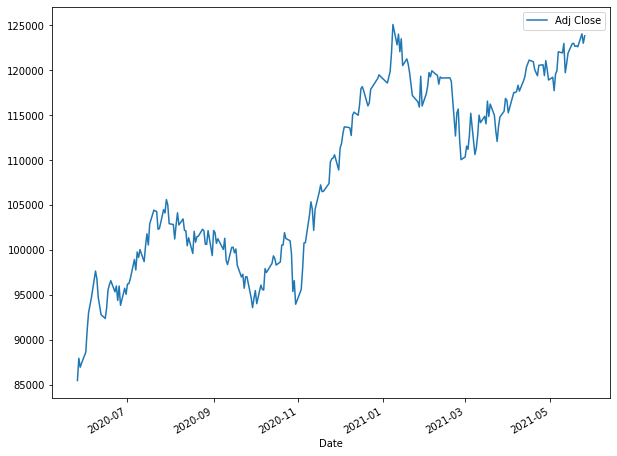

In [10]:
bovespa[['Adj Close']].plot(figsize=(10,8))
plt.show()

In [113]:
from sklearn.model_selection import train_test_split

x = np.array( pd.to_datetime(bovespa['Adj Close'].index.values), dtype='float').reshape(-1,1)
y = bovespa.iloc[:,-1].values

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=1/3, random_state=0)


In [111]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_train)

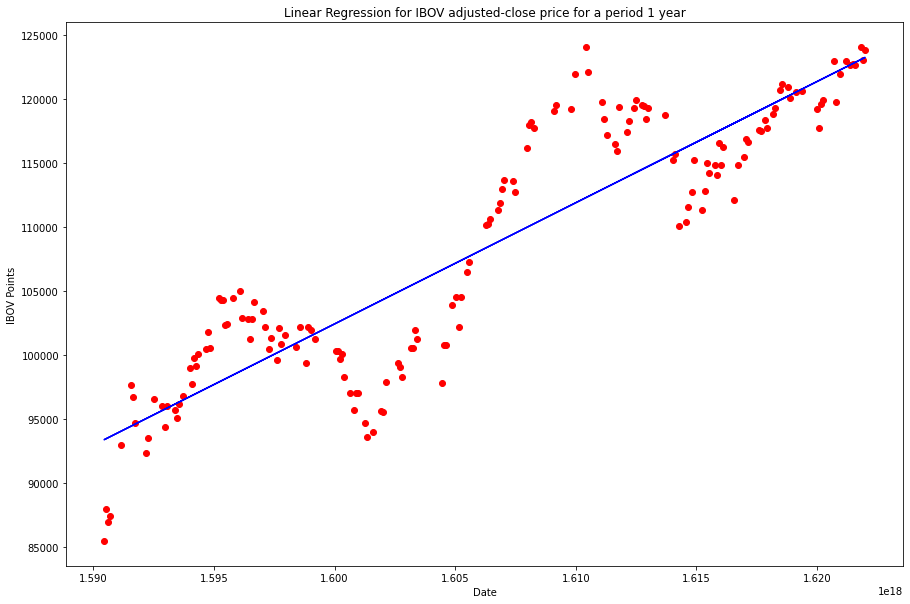

In [112]:
plt.figure(figsize=(15, 10))
plt.scatter(x_train, y_train, color='red')
plt.plot(x_train, y_pred, color='blue')
plt.title('Linear Regression for IBOV adjusted-close price for a period 1 year')
plt.xlabel('Date')
plt.ylabel('IBOV Points')
plt.show()